In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df=pd.read_csv(r'/Users/aniruddha/Dropbox/My Mac (Aniruddhas-iMac.local)/Downloads/PROJECT_FILES/hotel.csv')

In [45]:
df.columns

Index(['id', 'hotel_name', 'hotel_rating', 'hotel_experience', 'amenities',
       'address', 'country', 'location', 'price'],
      dtype='object')

In [46]:
df.head()

,id,hotel_name,hotel_rating,hotel_experience,amenities,address,country,location,price
0,1,Niagara Falls Marriott Fallsview Hotel & Spa,4.0,Very good,"['Pool', 'Restaurant', 'Fitness Centre with Gy...",6740 Fallsview Blvd Niagara Falls Ontario,Canada,"(43.0784124, -79.0820118287735)",118.0
1,2,Fairmont Royal York,4.5,Excellent,"['Restaurant', 'Room service', 'Fitness Centre...",100 Front Street W Toronto Ontario,Canada,"(43.6459092, -79.3813636)",489.0
2,3,Blue Horizon Hotel,4.5,Excellent,"['Pool', 'Restaurant', 'Free High Speed Intern...",1225 Robson St Vancouver British Columbia,Canada,"(49.2870098, -123.1285348)",169.0
3,4,Fairmont Le Chateau Frontenac,4.5,Excellent,"['Restaurant', 'Fitness Centre with Gym / Work...",1 Rue des Carrieres Quebec City Quebec,Canada,"(46.81182845, -71.2055490276425)",212.0
4,5,Rimrock Resort Hotel,4.5,Excellent,"['Pool', 'Room service', 'Fitness Centre with ...",300 Mountain Avenue Alberta,Canada,"(51.1615167, -115.5706911)",189.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5985 entries, 0 to 5984
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5985 non-null   int64  
 1   hotel_name        5985 non-null   object 
 2   hotel_rating      5000 non-null   float64
 3   hotel_experience  4223 non-null   object 
 4   amenities         5985 non-null   object 
 5   address           5985 non-null   object 
 6   country           5985 non-null   object 
 7   location          5985 non-null   object 
 8   price             1445 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 420.9+ KB


In [48]:
df.shape

(5985, 9)

id                     0
hotel_name             0
hotel_rating         985
hotel_experience    1762
amenities              0
address                0
country                0
location               0
price               4540
dtype: int64


<AxesSubplot:>

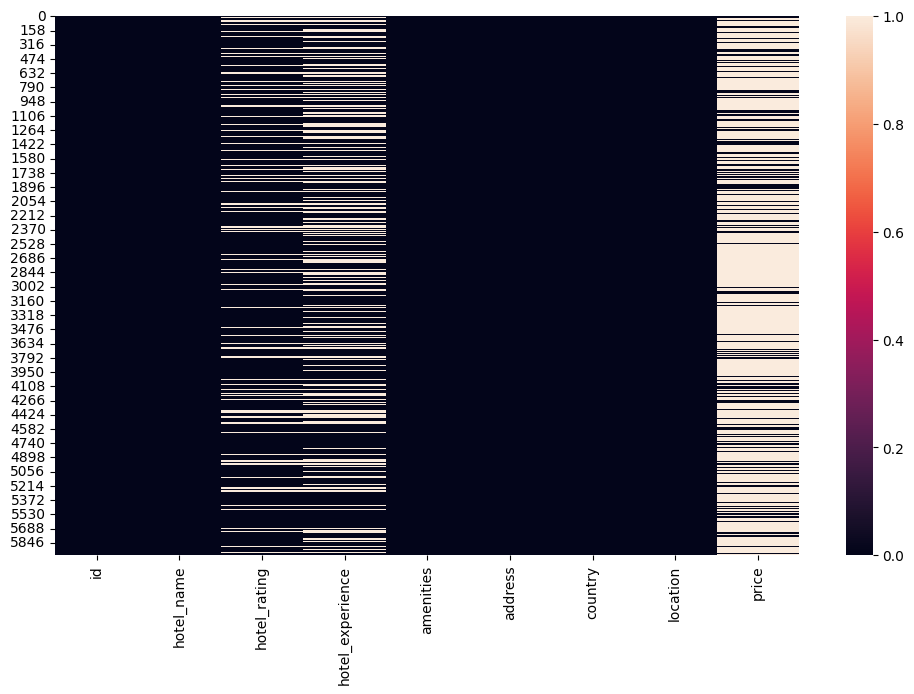

In [49]:
print(df.isnull().sum())
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())

In [50]:
#The above figure is of heat map showing null points for each feature

In [51]:
print(df.isnull().sum())

id                     0
hotel_name             0
hotel_rating         985
hotel_experience    1762
amenities              0
address                0
country                0
location               0
price               4540
dtype: int64


In [52]:
df.shape

(5985, 9)

In [53]:
df.drop(['country','location','hotel_experience'],axis=1,inplace=True)

In [54]:
df.head()

,id,hotel_name,hotel_rating,amenities,address,price
0,1,Niagara Falls Marriott Fallsview Hotel & Spa,4.0,"['Pool', 'Restaurant', 'Fitness Centre with Gy...",6740 Fallsview Blvd Niagara Falls Ontario,118.0
1,2,Fairmont Royal York,4.5,"['Restaurant', 'Room service', 'Fitness Centre...",100 Front Street W Toronto Ontario,489.0
2,3,Blue Horizon Hotel,4.5,"['Pool', 'Restaurant', 'Free High Speed Intern...",1225 Robson St Vancouver British Columbia,169.0
3,4,Fairmont Le Chateau Frontenac,4.5,"['Restaurant', 'Fitness Centre with Gym / Work...",1 Rue des Carrieres Quebec City Quebec,212.0
4,5,Rimrock Resort Hotel,4.5,"['Pool', 'Room service', 'Fitness Centre with ...",300 Mountain Avenue Alberta,189.0


In [55]:
add=df['address'].str.split(' ')

address=[]
for i in add:
    address.append(i[-1])
    
address=pd.DataFrame(address)    

In [56]:
df=pd.concat([df,address],1)

/Applications/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.


In [57]:
df.drop('address',axis=1,inplace=True)
df.rename(columns={0:'city'},inplace=True)

In [58]:
df['city'].value_counts()

Columbia        1355
                1303
Ontario         1020
Quebec           819
Alberta          480
Scotia           225
Saskatchewan     161
Brunswick        147
Labrador         129
Island           118
Yukon             46
Manitoba          44
V                 40
Territories       24
Nov               12
G                 10
P                  9
Sask               4
Edwar              3
A                  2
BC                 2
Nunavut            2
R                  2
Mago               2
O                  2
Co                 2
Magnetawan         1
Exeter             1
Vulcan             1
Ter                1
Ontari             1
Park               1
Inlet              1
Cardston           1
Clinton            1
Perc               1
Beaupr             1
Columb             1
Levi               1
Kenora             1
Gasp               1
Tobermory          1
Rimousk            1
SK                 1
Current            1
Tremblan           1
Canmore            1
Pangnirtung  

In [59]:
lst_remove=(df['city'].unique()).tolist()
lst_keep=['Columbia','Ontario','Quebec','Alberta','Saskatchewan','Scotia','Labrador','Brunswick']
for i in lst_keep:
    lst_remove.remove(i)

In [60]:
#lst_remove

In [61]:
lst_remove

for j in lst_remove:
    df['city'].replace(j,'others',inplace=True)

In [62]:
df['city'].value_counts()

others          1649
Columbia        1355
Ontario         1020
Quebec           819
Alberta          480
Scotia           225
Saskatchewan     161
Brunswick        147
Labrador         129
Name: city, dtype: int64

In [63]:
df['amenities']=df['amenities'].str.replace('[','').replace(']','')


/Applications/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [64]:
df['hotel_rating'].mean()

4.0296

In [65]:
df['hotel_rating']=df['hotel_rating'].fillna(3.5)

In [66]:
pvt=pd.pivot_table(df,index=['city'], aggfunc='median')
pvt=pd.DataFrame(pvt).reset_index()

In [67]:
pvt.drop(['hotel_rating','id'],axis=1,inplace=True)

In [68]:
pvt

,city,price
0,Alberta,105.0
1,Brunswick,101.0
2,Columbia,110.0
3,Labrador,119.5
4,Ontario,109.0
5,Quebec,104.0
6,Saskatchewan,104.0
7,Scotia,119.0
8,others,110.0


In [69]:
df=pd.merge(df,pvt,on=['city'],how='left')
df['price_x']=df['price_x'].fillna(df['price_y'])

In [70]:
df.drop(['price_y'],1,inplace=True)

/Applications/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [71]:
df

,id,hotel_name,hotel_rating,amenities,price_x,city
0,1,Niagara Falls Marriott Fallsview Hotel & Spa,4.0,"'Pool', 'Restaurant', 'Fitness Centre with Gym...",118.0,Ontario
1,2,Fairmont Royal York,4.5,"'Restaurant', 'Room service', 'Fitness Centre ...",489.0,Ontario
2,3,Blue Horizon Hotel,4.5,"'Pool', 'Restaurant', 'Free High Speed Interne...",169.0,Columbia
3,4,Fairmont Le Chateau Frontenac,4.5,"'Restaurant', 'Fitness Centre with Gym / Worko...",212.0,Quebec
4,5,Rimrock Resort Hotel,4.5,"'Pool', 'Room service', 'Fitness Centre with G...",189.0,Alberta
...,...,...,...,...,...,...
5980,6121,Poco Inn & Suites Hotel,4.5,"'Restaurant', 'Room service', 'Free parking', ...",169.0,Columbia
5981,6122,Oak Island Resort & Conference Centre,3.5,"'Pool', 'Free parking', 'Restaurant', 'Room se...",139.0,Scotia
5982,6123,Dalvay by the Sea Hotel,3.5,,110.0,others
5983,6124,Auberge West Brome,4.5,"'Pool', 'Free parking', 'Restaurant', 'Free Hi...",110.0,others


<AxesSubplot:xlabel='hotel_rating', ylabel='price_x'>

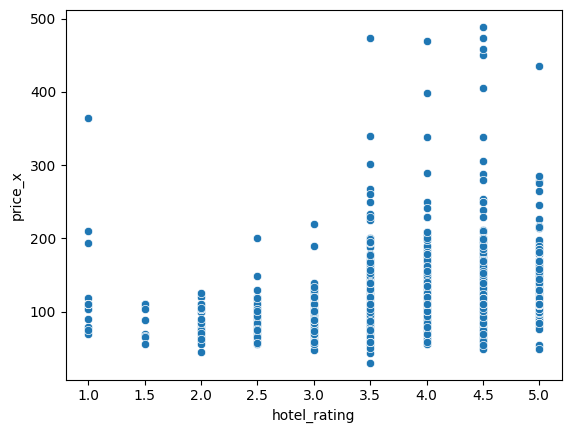

In [72]:
sns.scatterplot(x=df['hotel_rating'],y=df['price_x']) # As the ratings increases the prices of the hotels also increases
                    # especially there is a big jump from 3 star to 3.5 star and further

<AxesSubplot:xlabel='city', ylabel='price_x'>

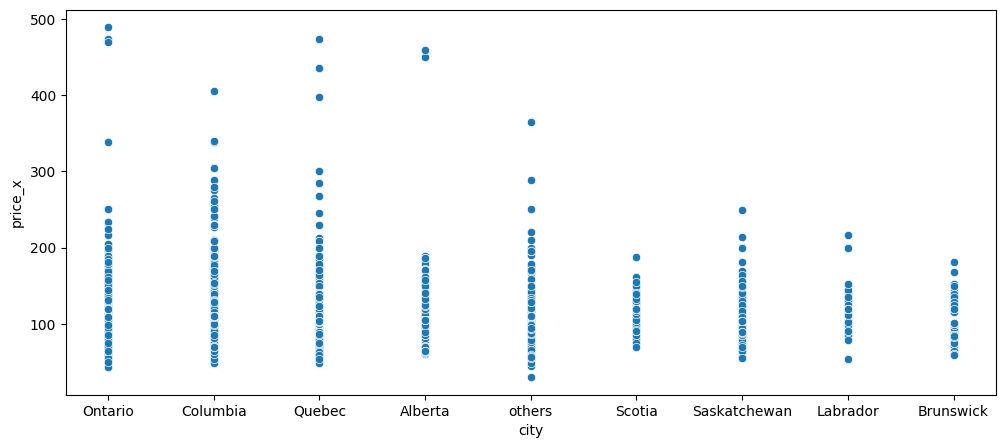

In [73]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df['city'],y=df['price_x'])

In [74]:
# ontario columbia and quebec are cities with wider price range of hotels

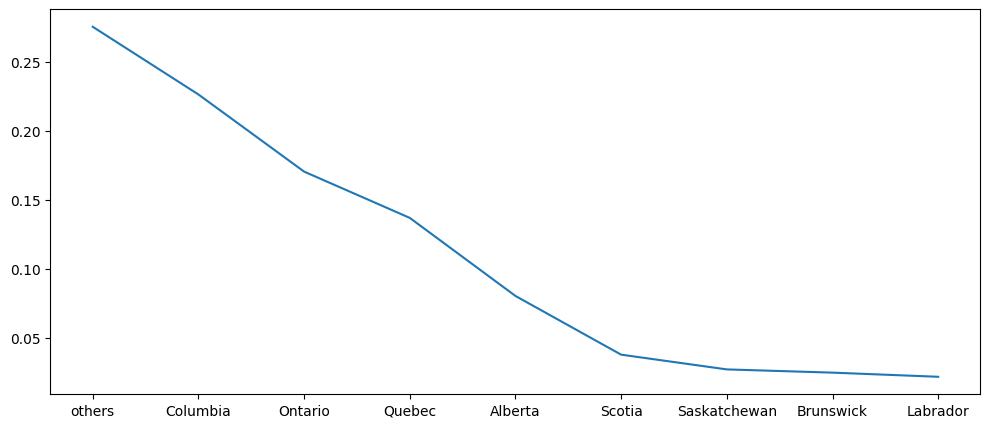

In [75]:
plt.figure(figsize=(12,5))
plt.plot(df['city'].value_counts(5))

In [76]:
#Columbia has the highest number of records as compared to the rest, labrador being the one with lowest.

<AxesSubplot:xlabel='hotel_rating', ylabel='Count'>

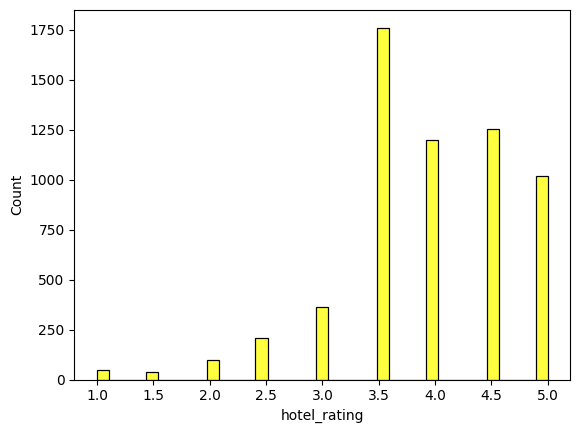

In [77]:
sns.histplot(df['hotel_rating'],color='yellow')

In [78]:
#3.5 is the rating with the highest count of records

id              0
hotel_name      0
hotel_rating    0
amenities       0
price_x         0
city            0
dtype: int64


<AxesSubplot:>

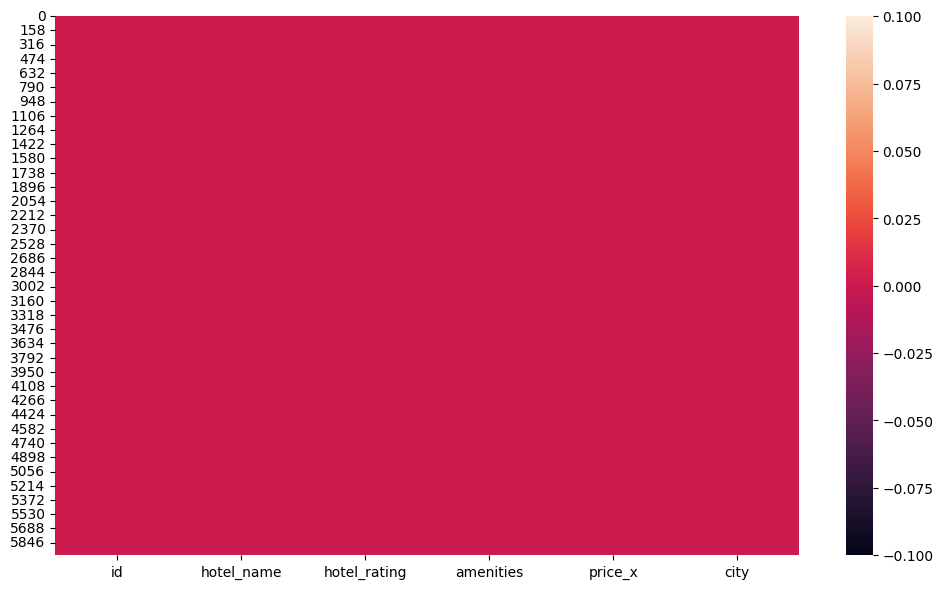

In [79]:
print(df.isnull().sum())
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())

In [80]:
#A complete absence of null points can be observed in the graph above. This is a dataset post cleaning. 

In [81]:
def hotel(city,price,exp):
    df['city']=df['city'].str.lower()
    final=df[(df['city']==city.lower()) & (df['price_x']<=price)]
    return(final[df['hotel_rating']==exp].head(5))


In [82]:
hotel('Ontario',140,4)


/Applications/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,id,hotel_name,hotel_rating,amenities,price_x,city
0,1,Niagara Falls Marriott Fallsview Hotel & Spa,4.0,"'Pool', 'Restaurant', 'Fitness Centre with Gym...",118.0,ontario
5,6,Niagara Falls Marriott on the Falls,4.0,"'Pool', 'Restaurant', 'Fitness Centre with Gym...",109.0,ontario
10,11,Best Western Plus Waterfront Hotel,4.0,"'Fitness Centre with Gym / Workout Room', 'Fre...",116.0,ontario
683,804,The Hawberry Motel,4.0,"'Free parking', 'Free High Speed Internet (WiF...",91.0,ontario
686,807,Buck Horn Motel,4.0,"'Free Internet', 'Free parking', 'Non-smoking ...",109.0,ontario


In [83]:
#hotel_rating = int(input("Enter your preferred hotel rating: "))
#city = str(input("Enter your preferred city: "))
#price_x = int(input("Enter your preferred budget: "))
#result = hotel(city, price_x, hotel_rating)
#print(result)





In [ ]:
import tkinter as tk

# Create a new Tkinter window
root = tk.Tk()

# Set the window title
root.title("Function GUI")

# Set the window size
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
window_width = int(screen_width * 0.8)
window_height = int(screen_height * 0.8)
root.geometry(f"{window_width}x{window_height}+{int(screen_width*0.1)}+{int(screen_height*0.1)}")

# Create a label for each input parameter
label_city = tk.Label(root, text="City:", font=("Arial", 20))
label_budget = tk.Label(root, text="Budget:", font=("Arial", 20))
label_rating = tk.Label(root, text="Rating:", font=("Arial", 20))

# Create a text box for each input parameter
textbox_city = tk.Entry(root, font=("Arial", 20))
textbox_budget = tk.Entry(root, font=("Arial", 20))
textbox_rating = tk.Entry(root, font=("Arial", 20))

# Create a label for the output
label_output = tk.Label(root, text="Output:", font=("Arial", 20))

# Create a text box for the output
textbox_output = tk.Text(root, font=("Arial", 20), height=10, width=60)

# Define the function to be called when the button is clicked
def calculate_output():
    # Get the values from the text boxes
    city = textbox_city.get()
    budget = float(textbox_budget.get())
    rating = float(textbox_rating.get())
    
    # Call your function to calculate the output
    output = hotel(city, budget, rating)
    
    # Set the output in the output text box
    textbox_output.delete("1.0", tk.END)
    textbox_output.insert(tk.END, output)

# Create a button to calculate the output
button = tk.Button(root, text="Calculate Output", font=("Arial", 20), command=calculate_output)

# Add the labels, text boxes, button, and output text box to the window
label_city.grid(row=0, column=0, padx=20, pady=20, sticky="e")
label_budget.grid(row=1, column=0, padx=20, pady=20, sticky="e")
label_rating.grid(row=2, column=0, padx=20, pady=20, sticky="e")
textbox_city.grid(row=0, column=1, padx=20, pady=20)
textbox_budget.grid(row=1, column=1, padx=20, pady=20)
textbox_rating.grid(row=2, column=1, padx=20, pady=20)
button.grid(row=3, column=1, padx=20, pady=20)
label_output.grid(row=4, column=0, padx=20, pady=20, sticky="e")
textbox_output.grid(row=4, column=1, padx=20, pady=20)

# Center all components in the window
for i in range(5):
    root.grid_rowconfigure(i, weight=1)
root.grid_columnconfigure(0, weight=1)
root.grid_columnconfigure(1, weight=1)

# Start the Tkinter event loop
root.mainloop()
